In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

retail_data = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

In [6]:
retail_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [2]:
print(retail_data.isnull().sum())



Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [3]:
retail_data.drop_duplicates(inplace=True)

In [4]:
descriptive_stats = retail_data.describe()
print(descriptive_stats)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


/tmp/ipykernel_33/2540307841.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = retail_data.resample('M', on='Date')['Total Amount'].sum()


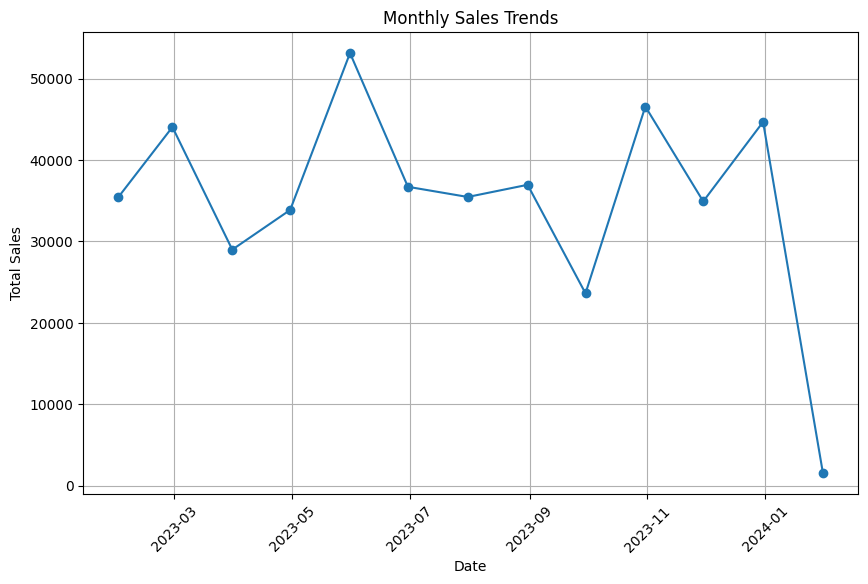

In [7]:
retail_data['Date'] = pd.to_datetime(retail_data['Date'])
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

monthly_sales = retail_data.resample('M', on='Date')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


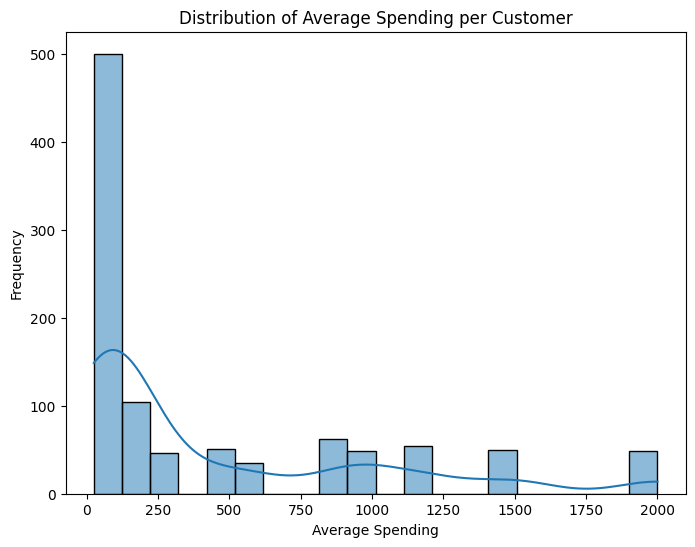

In [8]:
avg_spending_per_customer = retail_data.groupby('Customer ID')['Total Amount'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(avg_spending_per_customer, bins=20, kde=True)
plt.title('Distribution of Average Spending per Customer')
plt.xlabel('Average Spending')
plt.ylabel('Frequency')
plt.show()



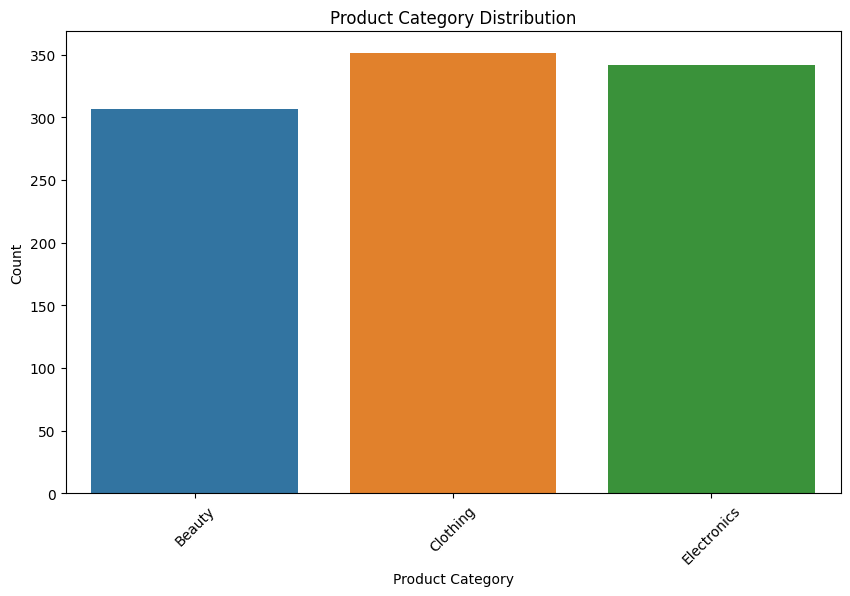

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=retail_data, x='Product Category')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

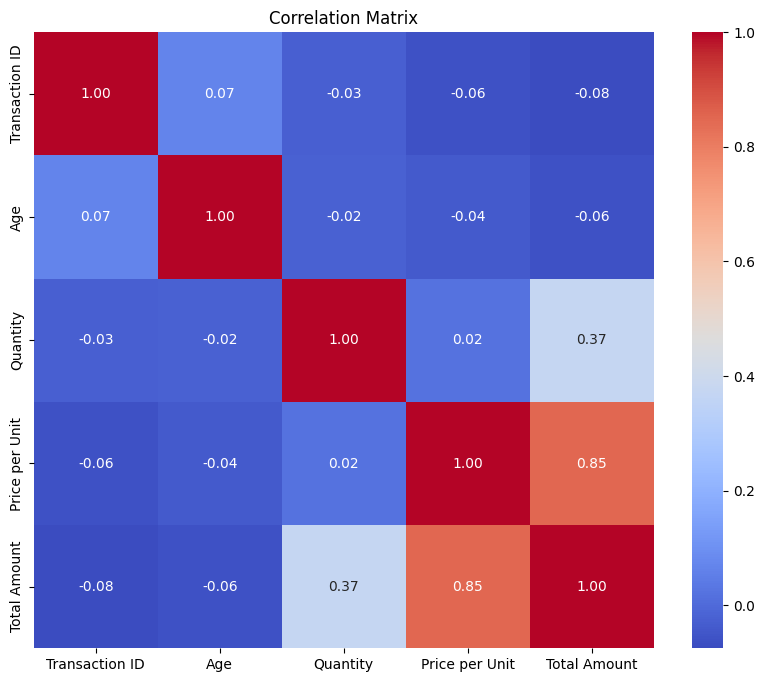

In [11]:
numeric_columns = retail_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


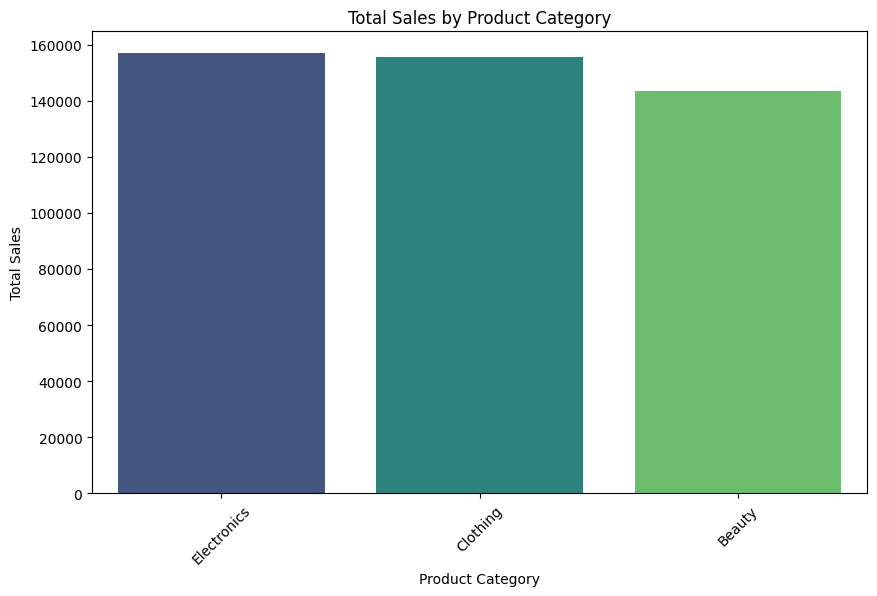

In [12]:
category_sales = retail_data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [25]:
top_categories = category_sales.head(3).index  
print("Top Selling Product Categories:")
print(top_categories)


top_categories = list(top_categories)
L = []
for i in range(3): 
    L.append(top_categories[i])

top_categories = top_categories[3:]  
print("Top Categories:", L)


Top Selling Product Categories:
Index(['Electronics', 'Clothing', 'Beauty'], dtype='object', name='Product Category')
Top Categories: ['Electronics', 'Clothing', 'Beauty']


In [26]:
print("Recommendation: Increase marketing efforts for the top-selling product categories. And top 3 products are ", L)

Recommendation: Increase marketing efforts for the top-selling product categories. And top 3 products are  ['Electronics', 'Clothing', 'Beauty']
